# Introduction to geospatial vector data in Python

In [4]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt 

## Importing geospatial data

Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database, ...

We can use the GeoPandas library to read many of those GIS file formats (relying on the `fiona` library under the hood, which is an interface to GDAL/OGR), using the `geopandas.read_file()` function.

For example, let's start by reading a shapefile with all the countries of the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/, zip file is available in the `/data` directory), and inspect the data:

In [14]:
# read data 
data = gpd.read_file("zip://../data/ne_110m_admin_0_countries.zip")
data.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [12]:
# reading shape files 
# countries = data = gpd.read_file(r'../shapefiles/world.shp')

## Exploring Data 

In [15]:
# type of dataframe 
type(data)

geopandas.geodataframe.GeoDataFrame

In [16]:
# shape 
data.shape 

(177, 6)

In [17]:
# dtypes 
data.dtypes 

iso_a3          object
name            object
continent       object
pop_est        float64
gdp_md_est     float64
geometry      geometry
dtype: object

In [18]:
# columns 
data.columns 

Index(['iso_a3', 'name', 'continent', 'pop_est', 'gdp_md_est', 'geometry'], dtype='object')

In [19]:
# info 
data.info() 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   iso_a3      177 non-null    object  
 1   name        177 non-null    object  
 2   continent   177 non-null    object  
 3   pop_est     177 non-null    float64 
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 8.4+ KB


In [22]:
data.head() 

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


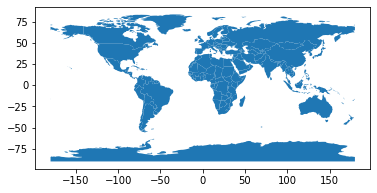

In [21]:
data.plot()
plt.show() 

What can we observe:

- Using `.head()` we can see the first rows of the dataset, just like we can do with Pandas.
- There is a 'geometry' column and the different countries are represented as polygons
- We can use the `.plot()` method to quickly get a *basic* visualization of the data

## What's a GeoDataFrame?

We used the GeoPandas library to read in the geospatial data, and this returned us a `GeoDataFrame`:

In [23]:
type(data)

geopandas.geodataframe.GeoDataFrame

A GeoDataFrame contains a tabular, geospatial dataset:

* It has a **'geometry' column** that holds the geometry information (or features in GeoJSON).
* The other columns are the **attributes** (or properties in GeoJSON) that describe each of the geometries

Such a `GeoDataFrame` is just like a pandas `DataFrame`, but with some additional functionality for working with geospatial data:

* A `.geometry` attribute that always returns the column with the geometry information (returning a GeoSeries). The column name itself does not necessarily need to be 'geometry', but it will always be accessible as the `.geometry` attribute.
* It has some extra methods for working with spatial data (area, distance, buffer, intersection, ...), which we will see in later notebooks

In [24]:
data.geometry

0      POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1      MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2      POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3      POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4      MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
                             ...                        
172    MULTIPOLYGON (((167.84488 -16.46633, 167.51518...
173    POLYGON ((52.00001 19.00000, 52.78218 17.34974...
174    POLYGON ((19.89577 -24.76779, 20.16573 -24.917...
175    POLYGON ((23.21505 -17.52312, 22.56248 -16.898...
176    POLYGON ((29.43219 -22.09131, 28.79466 -21.639...
Name: geometry, Length: 177, dtype: geometry

In [25]:
type(data.geometry)

geopandas.geoseries.GeoSeries

In [26]:
data.geometry.area

/tmp/ipykernel_17973/1639781399.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data.geometry.area


0       63.593500
1      103.599439
2        3.185163
3        7.095047
4      278.923392
          ...    
172      0.631326
173     38.475618
174    112.718524
175     62.789498
176     32.280371
Length: 177, dtype: float64

**It's still a DataFrame**, so we have all the pandas functionality available to use on the geospatial dataset, and to do data manipulations with the attributes and geometry information together.

For example, we can calculate average population number over all countries (by accessing the 'pop_est' column, and calling the `mean` method on it):

In [28]:
data['pop_est'].mean()

41712369.84180791

Or, we can use boolean filtering to select a subset of the dataframe based on a condition:

In [29]:
africa = data[data['continent'] == 'Africa']

<AxesSubplot:>

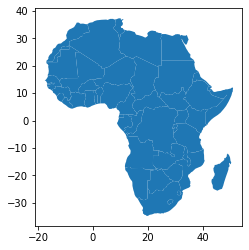

In [30]:
africa.plot()

---

The rest of the tutorial is going to assume you already know some pandas basics, but we will try to give hints for that part for those that are not familiar.   
A few resources in case you want to learn more about pandas:

- Pandas docs: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Other tutorials: chapter from pandas in https://jakevdp.github.io/PythonDataScienceHandbook/, https://github.com/jorisvandenbossche/pandas-tutorial, https://github.com/TomAugspurger/pandas-head-to-tail, ...

<div class="alert alert-info" style="font-size:120%">

**REMEMBER:** <br>

* A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations
* A `GeoDataFrame` (or *Feature Collection*) consists of:
    * **Geometries** or **features**: the spatial objects
    * **Attributes** or **properties**: columns with information about each spatial object

</div>

## Geometries: Points, Linestrings and Polygons

Spatial **vector** data can consist of different types, and the 3 fundamental types are:

![](../img/simple_features_3_text.svg)

* **Point** data: represents a single point in space.
* **Line** data ("LineString"): represents a sequence of points that form a line.
* **Polygon** data: represents a filled area.

And each of them can also be combined in multi-part geometries (See https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects for extensive overview).

For the example we have seen up to now, the individual geometry objects are Polygons:

In [31]:
print(data.geometry[2])

POLYGON ((21.0200403174764 40.84272695572588, 20.99998986174722 40.58000397395401, 20.67499677906363 40.43499990494303, 20.61500044117275 40.11000682225935, 20.15001590341052 39.62499766698397, 19.98000044117015 39.69499339452341, 19.96000166187321 39.91500580500605, 19.40608198413673 40.25077342382247, 19.31905887215714 40.72723012955356, 19.40354983895429 41.40956574153546, 19.54002729663711 41.71998607031276, 19.37176883309496 41.87754751237065, 19.37176816334725 41.8775506797835, 19.30448611825079 42.19574514420782, 19.73805138517963 42.68824738216557, 19.80161339689869 42.50009349219084, 20.07070000000004 42.58863000000008, 20.28375451018189 42.32025950781508, 20.52295000000004 42.21787000000006, 20.59024654668023 41.85540891928363, 20.59024743010491 41.85540416113361, 20.4631750830992 41.51508901627534, 20.60518191903736 41.08622630468523, 21.0200403174764 40.84272695572588))


Let's import some other datasets with different types of geometry objects.

A dateset about cities in the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/, zip file is available in the `/data` directory), consisting of Point data:

In [15]:
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")

In [16]:
print(cities.geometry[0])

POINT (12.45338654497177 41.90328217996012)


And a dataset of rivers in the world (from http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/, zip file is available in the `/data` directory) where each river is a (multi-)line:

In [17]:
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

In [18]:
print(rivers.geometry[0])

LINESTRING (51.9371337598152 55.70106609892139, 51.88086646731369 55.68625891701544, 51.82031249962222 55.69745514553858, 51.7476018274624 55.69366250841807, 51.6628417966117 55.60817291874525, 51.57871093775964 55.59943268477065, 51.51342773400279 55.58312409100404, 51.50854492161091 55.52948639548083, 51.48583984403365 55.49640534033426, 51.36914062543957 55.46796295772435, 51.21306254869774 55.50264985760492, 51.13452148447897 55.48273346527725, 51.07934570274205 55.46759674659262, 50.98022460947817 55.46637604371949, 50.83445217522774 55.45630956063775, 50.6883789060617 55.42011139502489, 50.4118652342932 55.40119049644431, 50.07802734358711 55.38112213757665, 49.82216796867687 55.33466217681809, 49.53222656260584 55.260614325191, 49.38232421848795 55.17182037990665, 49.24808475131027 55.11301870345045)


### The `shapely` library

The individual geometry objects are provided by the [`shapely`](https://shapely.readthedocs.io/en/stable/) library

In [19]:
type(countries.geometry[0])

shapely.geometry.polygon.Polygon

To construct one ourselves:

In [22]:
from shapely.geometry import Point, Polygon, LineString

In [23]:
p = Point(0, 0)

In [24]:
print(p)

POINT (0 0)


In [25]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])

In [26]:
polygon.area

0.5

In [27]:
polygon.distance(p)

1.4142135623730951

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**: <br>

Single geometries are represented by `shapely` objects:

* If you access a single geometry of a GeoDataFrame, you get a shapely geometry object
* Those objects have similar functionality as geopandas objects (GeoDataFrame/GeoSeries). For example:
    * `single_shapely_object.distance(other_point)` -> distance between two points
    * `geodataframe.distance(other_point)` ->  distance for each point in the geodataframe to the other point

</div>

## Plotting our different layers together

[(-20.0, 60.0), (-40.0, 40.0)]

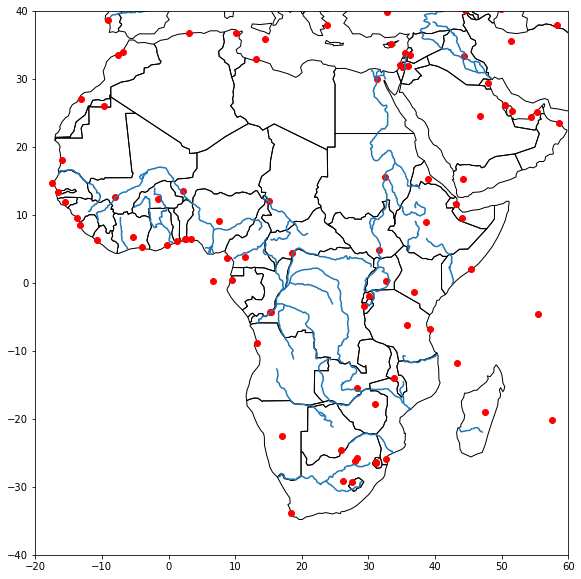

In [24]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

See the [04-more-on-visualization.ipynb](04-more-on-visualization.ipynb) notebook for more details on visualizing geospatial datasets.

## Let's practice!

Throughout the exercises in this course, we will work with several datasets about the city of Paris.

Here, we start with the following datasets:

- The administrative districts of Paris (https://opendata.paris.fr/explore/dataset/quartier_paris/): `paris_districts_utm.geojson`
- Real-time (at the moment I downloaded them ..) information about the public bicycle sharing system in Paris (vélib, https://opendata.paris.fr/explore/dataset/stations-velib-disponibilites-en-temps-reel/information/): `data/paris_bike_stations_mercator.gpkg`

Both datasets are provided as  files.

Let's explore those datasets:

<div class="alert alert-success">

**EXERCISE**:

We will start with exploring the bicycle station dataset (available as a GeoPackage file: `data/paris_bike_stations_mercator.gpkg`)
    
* Read the stations datasets into a GeoDataFrame called `stations`.
* Check the type of the returned object (with `type(..)`)
* Check the first rows of the dataframes. What kind of geometries dooes this datasets contain?
* How many features are there in the dataset? (hint: use the `.shape` attribute)
    
<details><summary>Hints</summary>

* The geopandas.read_file() function can read different geospatial file formats. You pass the file name as first argument.

</details>
    
    
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data1.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data2.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data3.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data4.py

<div class="alert alert-success">

**EXERCISE**:

* Make a quick plot of the `stations` dataset.
* Make the plot a bit larger byt setting the figure size to (12, 6) (hint: the `plot` method accepts a `figsize` keyword).
 
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data5.py

A plot with just some points can be hard to interpret without any spatial context. Therefore, in the next exercise we will learn how to add a background map.

We are going to make use of the [contextily](https://github.com/darribas/contextily) package. The `add_basemap()` function of this package makes it easy to add a background web map to our plot. We begin by plotting our data first, and then pass the matplotlib axes object (returned by dataframe's `plot()` method) to the `add_basemap()` function. `contextily` will then download the web tiles needed for the geographical extent of your plot.




<div class="alert alert-success">

**EXERCISE**:

* Import `contextily`.
* Re-do the figure of the previous exercise: make a plot of all the points in `stations`, but assign the result to an `ax` variable.
* Set the marker size equal to 5 to reduce the size of the points (use the `markersize` keyword of the `plot()` method for this).
* Use the `add_basemap()` function of `contextily` to add a background map: the first argument is the matplotlib axes object `ax`.

</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data6.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data7.py

<div class="alert alert-success">

**EXERCISE**:

* Make a histogram showing the distribution of the number of bike stands in the stations.

<details>
  <summary>Hints</summary>

* Selecting a column can be done with the square brackets: `df['col_name']`
* Single columns have a `hist()` method to plot a histogram of its values.
    
</details>
    
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data8.py

<div class="alert alert-success">

**EXERCISE**:

Let's now visualize where the available bikes are actually stationed:
    
* Make a plot of the `stations` dataset (also with a (12, 6) figsize).
* Use the `'available_bikes'` colums to determine the color of the points. For this, use the `column=` keyword.
* Use the `legend=True` keyword to show a color bar.
 
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data9.py

<div class="alert alert-success">

**EXERCISE**:

Next, we will explore the dataset on the administrative districts of Paris (available as a GeoJSON file: "data/paris_districts_utm.geojson")

* Read the dataset into a GeoDataFrame called `districts`.
* Check the first rows of the dataframe. What kind of geometries does this dataset contain?
* How many features are there in the dataset? (hint: use the `.shape` attribute)
* Make a quick plot of the `districts` dataset (set the figure size to (12, 6)).
    
</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data10.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data11.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data12.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data13.py

<div class="alert alert-success">

**EXERCISE**:
    
What are the largest districts (biggest area)?

* Calculate the area of each district.
* Add this area as a new column to the `districts` dataframe.
* Sort the dataframe by this area column for largest to smallest values (descending).

<details><summary>Hints</summary>

* Adding a column can be done by assing values to a column using the same square brackets syntax: `df['new_col'] = values`
* To sort the rows of a DataFrame, use the `sort_values()` method, specifying the colum to sort on with the `by='col_name'` keyword. Check the help of this method to see how to sort ascending or descending.

</details>

</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data14.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data15.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data16.py

<div class="alert alert-success">

**EXERCISE**:

* Add a column `'population_density'` representing the number of inhabitants per squared kilometer (Note: The area is given in squared meter, so you will need to multiply the result with `10**6`).
* Plot the districts using the `'population_density'` to color the polygons. For this, use the `column=` keyword.
* Use the `legend=True` keyword to show a color bar.

</div>

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data17.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data18.py

In [ ]:
# %load _solved/solutions/01-introduction-geospatial-data19.py

---

## For the curious: A bit more on importing and creating GeoDataFrames

### Note on `fiona`

Under the hood, GeoPandas uses the [Fiona library](http://toblerity.org/fiona/) (pythonic interface to GDAL/OGR) to read and write data. GeoPandas provides a more user-friendly wrapper, which is sufficient for most use cases. But sometimes you want more control, and in that case, to read a file with fiona you can do the following:


In [ ]:
import fiona
from shapely.geometry import shape

with fiona.Env():
    with fiona.open("zip://./data/ne_110m_admin_0_countries.zip") as collection:
        for feature in collection:
            # ... do something with geometry
            geom = shape(feature['geometry'])
            # ... do something with properties
            print(feature['properties']['name'])

### Constructing a GeoDataFrame manually

In [ ]:
geopandas.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2)],
    'attribute1': [1, 2],
    'attribute2': [0.1, 0.2]})

### Creating a GeoDataFrame from an existing dataframe

For example, if you have lat/lon coordinates in two columns:

In [ ]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [ ]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [ ]:
gdf

See http://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html for full example